# Problem Description

A manufacturer has 3 warehouses from which it distributes items to 5 customers.There is also a warehouse activation cost every time it is used. After elaborating a survey, the manufacturer found the production capacity at each factory, the transportation cost to customers, and the demand amount at each customer as shown below. 


So, how much should the manufacturer send from each warehouse and via which routes, to **minimize the total transportation cost?**




![modesCapture.PNG](https://raw.githubusercontent.com/Arnab-Rajkhowa/Optimizations/master/images/modesCapture.PNG)


![actcost.PNG](https://raw.githubusercontent.com/Arnab-Rajkhowa/Optimizations/master/images/actcost.PNG)
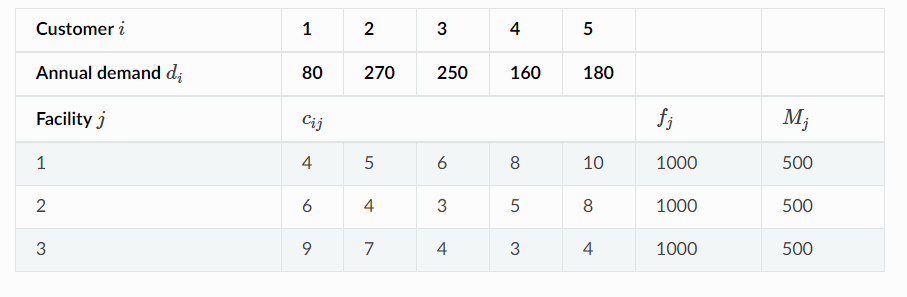
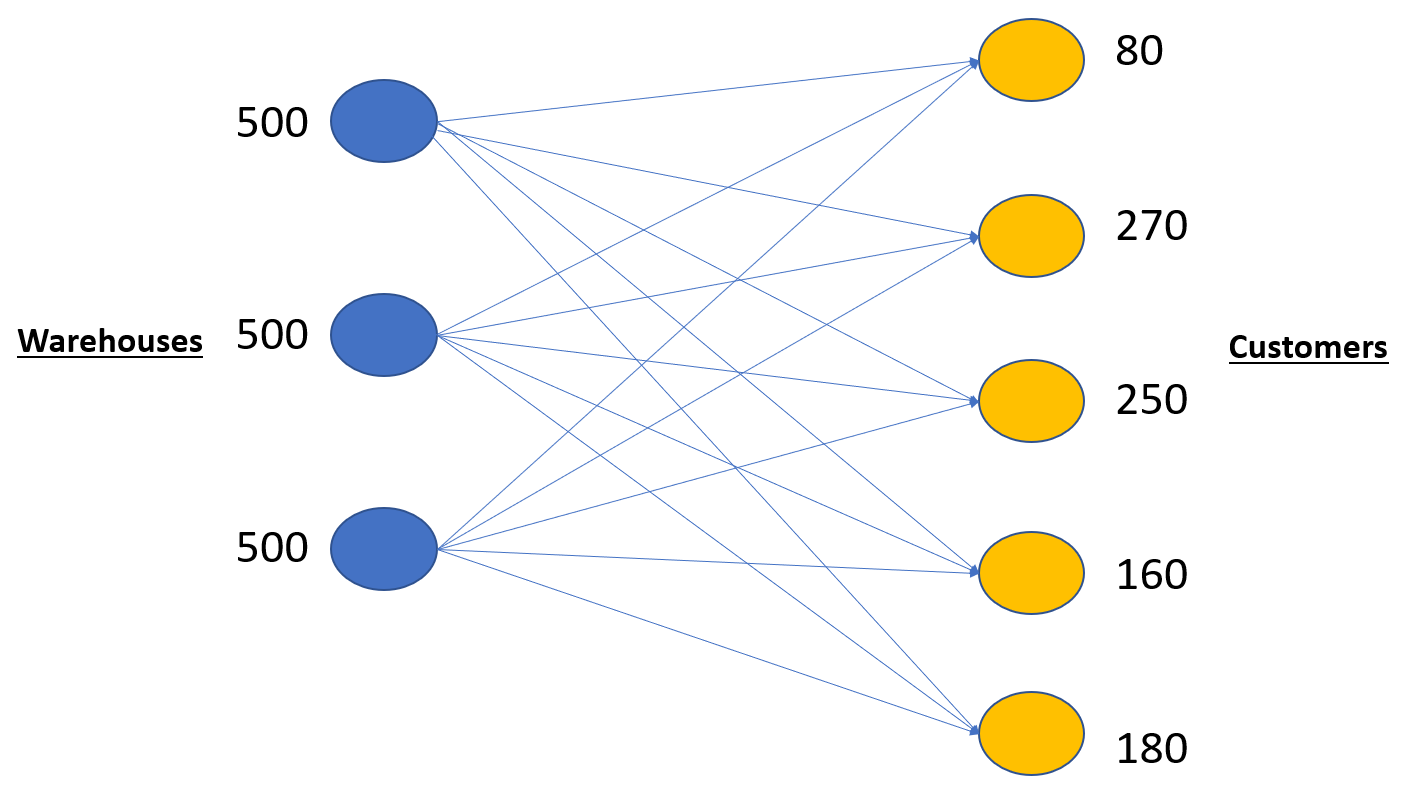

### Store the data in an usable format:

The first step is to store the data needed in a format that can be used in our optimization. In our case, we shall mainly be working with Python lists and dictionaries.

In [2]:
from pulp import *

# Creates a list of all the supply nodes
Warehouses = ["A","B","C"]

# Creates a dictionary for the number of units of supply from each warehouse
# to avoid confusion, I'm renaming the warehouses to "A,B,C" instead of "1,2,3"
supply = {"A": 500,
          "B": 500,
          "C": 500}


# Creates a list of all demand nodes
Customers = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1":80,
        "2": 270,
        "3": 250,
        "4": 160,
        "5": 180}

#Warehouse activation costs
allo_cost = {"A": 1000,
             "B": 1000,
             "C": 1000}

# Creates a list of costs of each transportation path
costs = [#Customers
    
        #1 2 3 4 5
        [4,5,6,8,10],#A  Warehouses
        [6,4,3,5,8],#B
        [9,7,4,2,4]#C        
        ]

costs = makeDict([Warehouses,Customers],costs,0)

### Define the type of optimization :

In our case, we want to minimize the total transportation cost, so we shall be using "LpMinimize"

In [3]:
prob = LpProblem("Facility_Allocation_Problem",LpMinimize)

### Generate the decision variables:

We have 2 sets of decision variables here:

   * Which of the warehouses should we use? (a binary choice)
   * How much to send via each route?




In [4]:
ser_vars = LpVariable.dicts("Service",
                           [(i,j) for i in Customers
                                  for j in Warehouses],
                           0)

use_vars = LpVariable.dicts("Use_Location",Warehouses,0,1,LpBinary)

### Define the objective function :

Our objective function is concerned with minimizing the total transportation cost, which in our case is the sum of all possible routes times the route cost.

In [5]:
# The objective function is added to prob first
prob += lpSum(allo_cost[j]*use_vars[j] for j in Warehouses)+ \
lpSum(costs[j][i]*ser_vars[(i,j)] for j in Warehouses for i in Customers )


### Define the constraints :

There are 2 constraints in our problem:
   
   * **Demand constraint:**   
     The customer demand should be met (no backorders)
     
     
   * **Capacity constraint:**   
   The warehouse cannot supply more than customer demand

In [6]:
# The demand minimum constraints are added to prob for each demand node (bar)
for i in Customers:
    prob += lpSum([ser_vars[(i,j)] for j in Warehouses]) == demand[i]
    
# The supply maximum constraints are added to prob for each supply node (warehouse)
for j in Warehouses:
    prob += lpSum([ser_vars[(i,j)] for i in Customers]) <= supply[j]*use_vars[j]

for i in Customers:
    for j in Warehouses:
        prob += ser_vars[(i,j)] <= demand[i]*use_vars[j]
    

### Solving the problem:

On solving the problem, we get the optimal solution, which warehouses to activate, which routes to follow and the total transportation cost.

In [ ]:
# The problem data is written to an .lp file
print(prob)

In [13]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Problem Status:", LpStatus[prob.status])

print('------------------------------------------------------------')

for var in use_vars:
    var_value = use_vars[var].varValue
    print("Should Warehouse {0} be used? = {1}".format(var[0],var_value))
    
print('------------------------------------------------------------')

for var in ser_vars:
    var_value = ser_vars[var].varValue
    print("Send {0} units from Warehouse {1} to Customer {2}".format(var_value,var[1], var[0]))
    
print('------------------------------------------------------------')
        
# The optimised objective function value is printed to the screen
print("Total Cost of Transportation is ${} " .format(value(prob.objective)))

Problem Status: Optimal
------------------------------------------------------------
Should Warehouse A be used? = 0.0
Should Warehouse B be used? = 1.0
Should Warehouse C be used? = 1.0
------------------------------------------------------------
Send 0.0 units from Warehouse A to Customer 1
Send 80.0 units from Warehouse B to Customer 1
Send 0.0 units from Warehouse C to Customer 1
Send 0.0 units from Warehouse A to Customer 2
Send 270.0 units from Warehouse B to Customer 2
Send 0.0 units from Warehouse C to Customer 2
Send 0.0 units from Warehouse A to Customer 3
Send 150.0 units from Warehouse B to Customer 3
Send 100.0 units from Warehouse C to Customer 3
Send 0.0 units from Warehouse A to Customer 4
Send 0.0 units from Warehouse B to Customer 4
Send 160.0 units from Warehouse C to Customer 4
Send 0.0 units from Warehouse A to Customer 5
Send 0.0 units from Warehouse B to Customer 5
Send 180.0 units from Warehouse C to Customer 5
---------------------------------------------------